In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/../src/simulations_v2")
    sys.path.append(module_path + "/..")
from load_params import load_params

from multi_group_simulation import MultiGroupSimulation

In [2]:
from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *
from plot_utils import *
configure_plot(plt)

In [3]:
prior_sim_files = []
for i in range(200):
    fname = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_19_sims/prior_sims_1624160155/prior_{}.dill'.format(i)
    prior_sim_files.append(fname)

prior_data = load_sim_output(prior_sim_files)
prior_data

,asymp_prob_mult,inital_prev_mult,R0,outside_inf_mult,daily_self_report_prob,ct_mult,ct_testing_ratio,test_sensitivity,test_noncompliance,E_time,...,res_cornell_inf_90,res_ithaca_inf_10,res_ithaca_inf_50,res_ithaca_inf_90,vir_cornell_inf_10,vir_cornell_inf_50,vir_cornell_inf_90,vir_ithaca_inf_10,vir_ithaca_inf_50,vir_ithaca_inf_90
0,1.105403,1.027147,3.639263,1.164544,0.223732,1.788490,1.141808,0.610485,0.128067,1.588502,...,434.6,264.4,304.0,351.4,6504.1,6628.0,6753.5,3433.9,3750.0,3984.4
1,1.034458,0.934665,1.426772,1.018528,0.466081,1.836050,0.816283,0.653479,0.137818,2.154963,...,125.0,133.9,147.5,163.1,137.9,181.0,271.9,162.5,177.5,202.0
2,1.119300,1.061253,3.057253,1.092259,0.321024,0.787352,0.733479,0.724924,0.123132,2.026480,...,617.4,266.6,307.0,348.2,7313.5,7505.0,7661.2,4714.1,5069.0,5408.4
3,0.831878,0.966304,1.747983,1.105153,0.410393,1.748110,0.911399,0.587266,0.118356,1.344632,...,152.4,152.8,169.0,184.2,153.8,233.0,336.1,196.6,215.5,243.2
4,0.798042,0.553348,2.608265,1.202193,0.354607,1.787774,1.255935,0.779187,0.110719,2.444074,...,150.2,146.0,166.0,186.2,136.9,171.0,239.1,162.9,186.5,210.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.978172,1.224422,1.051221,1.355805,0.222087,1.839923,1.003761,0.715986,0.086677,3.026787,...,148.1,181.9,196.0,214.1,149.9,186.0,227.2,217.6,233.5,252.6
196,0.573802,1.201498,2.347837,1.276204,0.435707,1.653757,1.027820,0.545983,0.070850,2.188369,...,199.4,184.7,205.0,217.1,156.8,199.0,268.9,210.9,231.5,251.0
197,0.804410,1.459066,2.057836,0.685738,0.417540,1.317804,1.228906,0.451050,0.093532,2.018916,...,200.0,151.7,170.5,182.0,269.3,578.5,1048.0,212.9,272.0,339.6
198,0.927828,0.737379,2.588087,0.706247,0.478736,1.502405,1.085930,0.615764,0.126489,1.683080,...,171.2,109.8,130.0,153.4,180.7,310.5,595.1,149.5,183.0,230.7


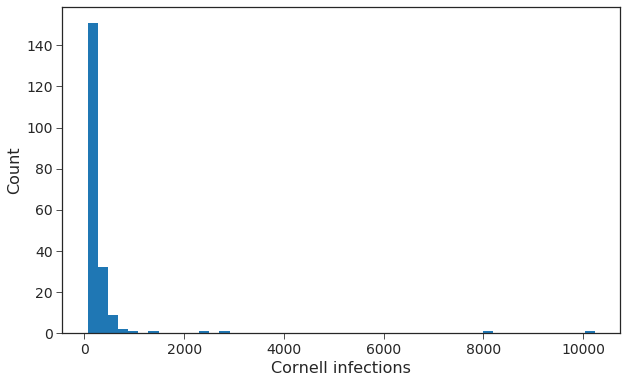

In [8]:
plt.figure(figsize=(10,6))
plt.hist(prior_data['res_cornell_inf_50'], bins=50)

# plt.title('Histogram of the median Cornell infections (Residential scenario)')
plt.xlabel('Cornell infections')
plt.ylabel('Count')
plt.show()

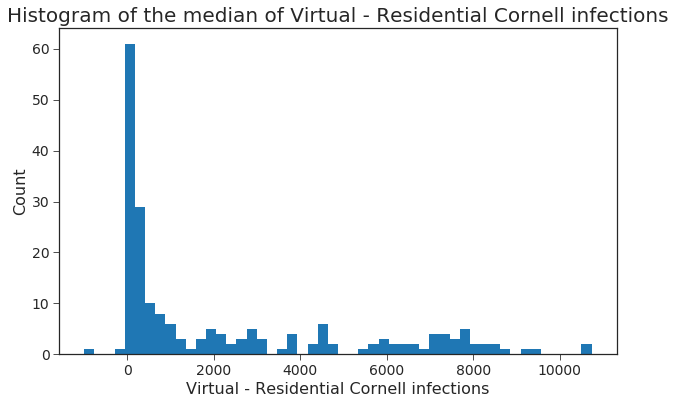

In [5]:
plt.figure(figsize=(10,6))
plt.hist(np.array(prior_data['vir_cornell_inf_50']) - np.array(prior_data['res_cornell_inf_50']), bins=50)

# plt.title('Histogram of the median of Virtual - Residential Cornell infections')
plt.xlabel('Virtual - Residential Cornell infections')
plt.ylabel('Count')
plt.show()

In [6]:
# prior_data['color'] = ['blue' if prior_data['res_cornell_inf_50'] > prior_data['vir_cornell_inf_50'] else 'red']
# prior_data
# [if prior_data['res_cornell_inf_50'] > prior_data['vir_cornell_inf_50'] 'blue' else 'red']
# prior_data['res_cornell_inf_50'] > prior_data['vir_cornell_inf_50']
prior_data['color'] = np.where(prior_data['res_cornell_inf_50'] > prior_data['vir_cornell_inf_50'], 'red', 'blue')

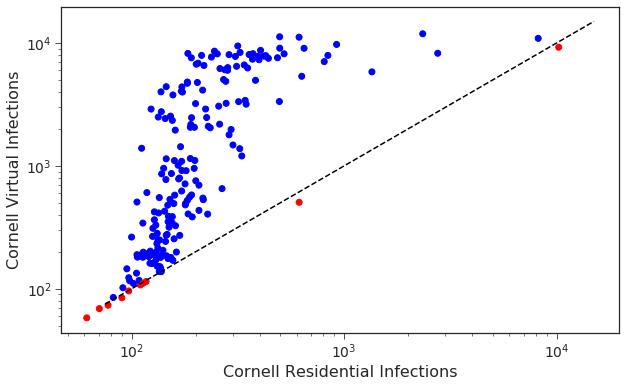

In [10]:
plt.figure(figsize=(10,6))
plt.scatter('res_cornell_inf_50', 'vir_cornell_inf_50', c='color', data=prior_data)
plt.plot(range(75,15000), range(75,15000), c='black', linestyle='dashed')
plt.xscale('log')
plt.yscale('log')

# plt.title('Residential vs. Virtual infections')
plt.xlabel('Cornell Residential Infections')
plt.ylabel('Cornell Virtual Infections')

plt.show()